# Part II - (Ford Gobike System Data Exploration)
## by (Maureen Anyango)

## Investigation Overview
> In the data exploration, I explored individual bike rides taken from Ford Gobike bike-sharing system in San Francisco Bay Area, California in 2019. The main focus was which hour(s) of the day, which day(s) of the week and month(s) of the year were most trips taken and features that can best predict average bike trip like duration, age, gender and user type.


## Dataset Overview

> The Ford GoBike System dataset includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area in 2019.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
gobike_clean = pd.read_csv('clean_data.csv')
gobike_clean.head()

,duration_sec,start_time,end_time,start_station_name,end_station_name,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_month,start_day,start_hour,end_month,end_day,end_hour,age,duration_min
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,Customer,1984.0,Male,No,February,Thursday,17,March,Friday,8,35,869.750000
1,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,Market St at Dolores St,Powell St BART Station (Market St at 4th St),Customer,1972.0,Male,No,February,Thursday,12,March,Friday,5,47,1030.900000
2,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,Grove St at Masonic Ave,Central Ave at Fell St,Subscriber,1989.0,Other,No,February,Thursday,17,March,Friday,4,30,608.166667
3,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,Frank H Ogawa Plaza,10th Ave at E 15th St,Subscriber,1974.0,Male,Yes,February,Thursday,23,March,Friday,0,45,26.416667
4,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,4th St at Mission Bay Blvd S,Broadway at Kearny,Subscriber,1959.0,Male,No,February,Thursday,23,March,Friday,0,60,29.883333


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Visualization 1)

> ***What is the distribution of trip duration?***

> The distribution of Trip duration is heavily skewed right therefore a log scale tranformation was applied to the plot. The distribution of duration after apply a log scale transformation the distribution looks roughly bimodal with the highest peak between 8 minutes and 10 minutes. Majority of the trips lasts between 8 minutes and 15 minutes.

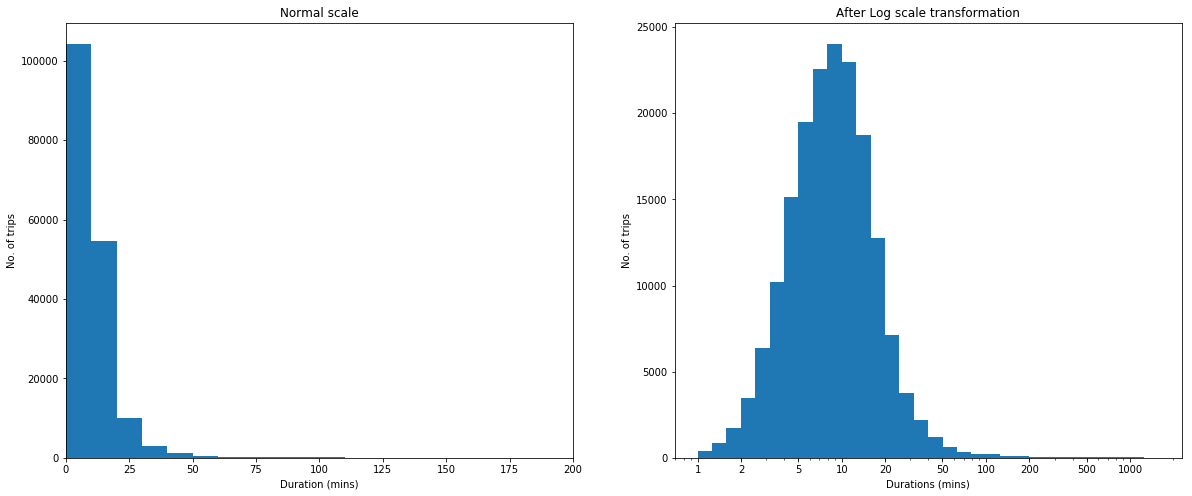

In [3]:
plt.figure(figsize=[20,8])

plt.subplot(1, 2, 1)
binsize = 10
bins = np.arange(0, gobike_clean.duration_min.max()+binsize, binsize)
plt.hist(data=gobike_clean, x='duration_min', bins=bins)
plt.xlabel('Duration (mins)')
plt.ylabel('No. of trips')
plt.title('Normal scale')
plt.xlim(0, 200);

plt.subplot(1, 2, 2)
# plotting on a Logarthmic scale transformation
bins = 10 ** np.arange(0, np.log10(gobike_clean.duration_min).max()+0.1, 0.1)
plt.hist(data=gobike_clean, x='duration_min', bins=bins)
tick_locs = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000]
plt.xlabel('Durations (mins)')
plt.ylabel('No. of trips')
plt.title('After Log scale transformation')
plt.xscale('log')
plt.xticks(tick_locs, tick_locs);

## (Visualization 2)

> ***Comparing trip Duration against days of the week for each gender***

> The trend of trip duration is at it peak on weekends from Friday to Saturday for all gender type. Males take the shortest bike trips compared to female and other genders.

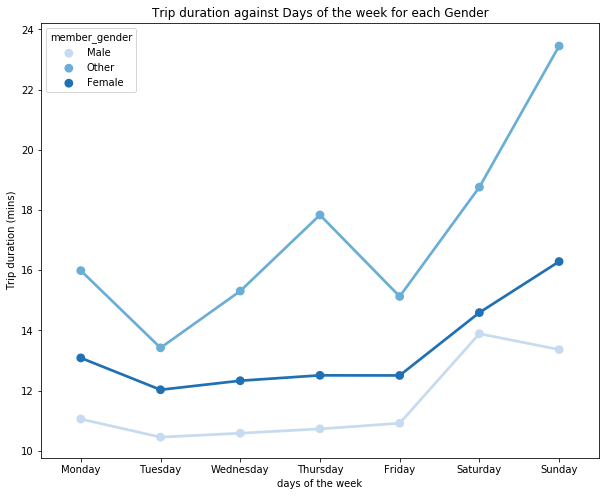

In [4]:
startday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ordered_startday =pd.api.types.CategoricalDtype(ordered=True,
                                                categories=startday)
gobike_clean['start_day'] = gobike_clean['start_day'].astype(ordered_startday)

fig = plt.figure(figsize=[10,8])

sb.pointplot(data=gobike_clean, x='start_day', y='duration_min', hue='member_gender', palette='Blues', ci=None)
plt.xlabel('days of the week')
plt.ylabel('Trip duration (mins)')
plt.title('Trip duration against Days of the week for each Gender');


## (Visualization 3)

> ***Comparing trip Duration against age for each gender***

> Younger Female users take longer rides compare to younger male users while more older males user take longer trip than older female users. The most longest trip duration among all gender types are in the 20 to 60 age group.

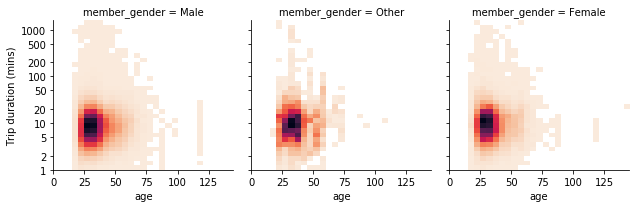

In [5]:
# Compute the logarithmic scale on duration_min
def log_trans(x, inverse = False):
    """quick function for computing log and power operations """
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)
    
gobike_clean['log_duration_min'] = gobike_clean['duration_min'].apply(log_trans)
# Define a function to create heatmaps
def hist2grid(x, y, **kwargs):
    """creating heatmaps with seaborn's PairGrid."""
    palette = kwargs.pop('color')
    bins_x = np.arange(0, gobike_clean['age'].max()+5, 5)
    bins_y = np.arange(0, 3.2+0.1, 0.1)
    plt.hist2d(x, y, bins = [bins_x, bins_y], cmap=palette, cmin=0.5)
    plt.yticks(log_trans(np.array([1, 2, 5, 10, 20, 50, 100, 200, 500, 1000])),
               [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000]);
    
    # Plot a heatmap grid for age, duration vs gender
g = sb.FacetGrid(data=gobike_clean, col='member_gender', col_wrap=3, size=3)
g.map(hist2grid, 'age', 'log_duration_min', color='rocket_r')
plt.yticks(log_trans(np.array([1, 2, 5, 10, 20, 50, 100, 200, 500, 1000])),
               [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000])
g.set_xlabels('age')
g.set_ylabels('Trip duration (mins)');

## (Visualization 4)

> ***Comparing trip Duration against age for each user type***

> Subscriber are slighly older than customers users whereas customer users generally take longer bike trip than subscriber of relatively same age. Majority of the both subcriber and customer users are between age 20 and 60.

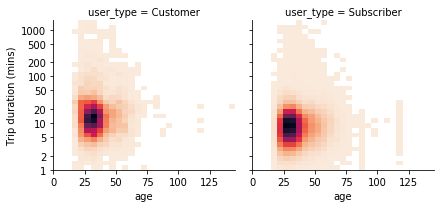

In [6]:
 # Plot a heatmap grid for age, duration vs gender
g = sb.FacetGrid(data=gobike_clean, col='user_type', col_wrap=3, size=3)
g.map(hist2grid, 'age', 'log_duration_min', color='rocket_r')
plt.yticks(log_trans(np.array([1, 2, 5, 10, 20, 50, 100, 200, 500, 1000])),
               [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000])
g.set_xlabels('age')
g.set_ylabels('Trip duration (mins)');


## Key Insights for Presentation

> The trip duration is an important feature and is influenced by the following features:
- Age
People within 20 to 60 age group take the longest trip duration compared to other age groups.
- Gender
Female tends to take the longest trip duration more than males or other gender in contrast to taking the least number of trips.
- Day of the week
The longest trip are taken on the weekends compared to weekdays.
- User type
Customers tends to take the longest trip duration compared to subscribers.


### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 384165 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_template.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
